In [1]:
import pandas as pd
import requests 
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from scipy.stats import norm, skew

print('The scikit-learn version is {}.'.format(sklearn.__version__))

import warnings 
warnings.filterwarnings('ignore')

The scikit-learn version is 0.20.3.


In [2]:
test_data = pd.read_csv("../input/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
test_data.shape

(1459, 80)

In [4]:
ames_df = pd.read_csv("../input/train.csv")
ames_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
ames_df.shape

(1460, 81)

# Exploratory Data Analysis

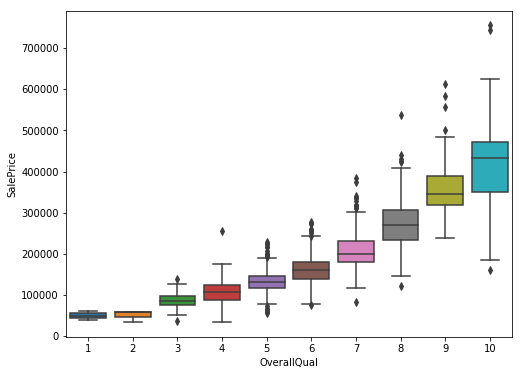

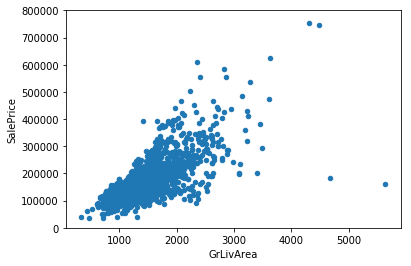

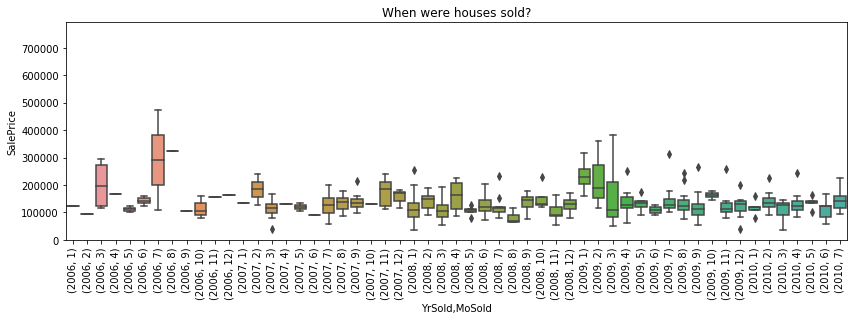

Oldest house built in 1872. Newest house built in 2010.


Text(0.5,1,'When were the houses built?')

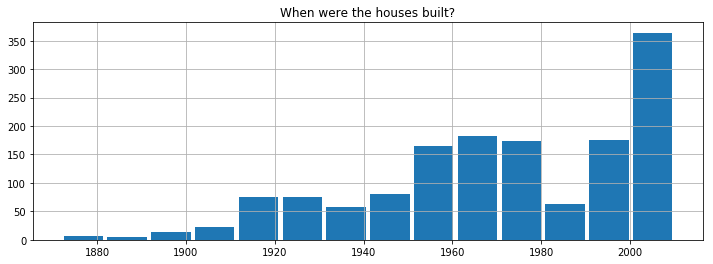

In [6]:
# check a categorical explanatory variable
var = 'OverallQual'
data = pd.concat([ames_df['SalePrice'], ames_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data = data)

# check a quantitative explanatory variable
var = 'GrLivArea'
data = pd.concat([ames_df['SalePrice'], ames_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000));

# year built will likely be an important variable, so check this one too
var = 'YearBuilt'
data = pd.concat([ames_df['SalePrice'], ames_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
plt.xticks(rotation=90);

# When were houses sold?
ames_df.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When were houses sold?')
plt.show()

# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    ames_df.YearBuilt.min(), ames_df.YearBuilt.max()))
ames_df.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')


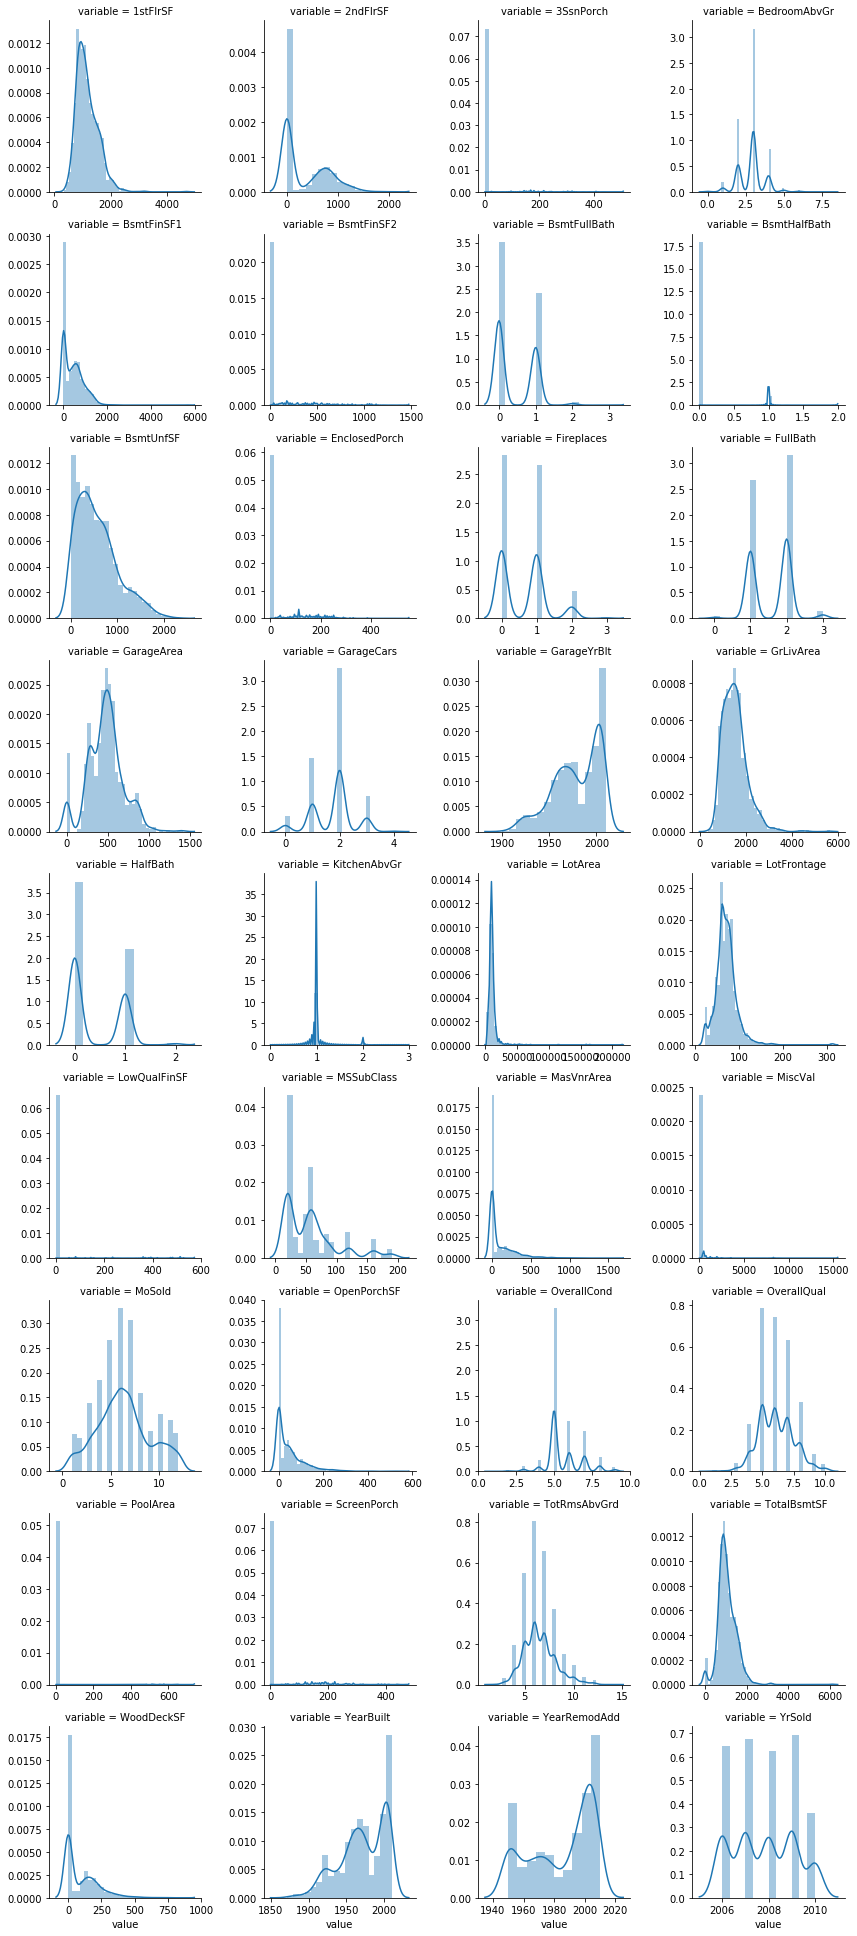

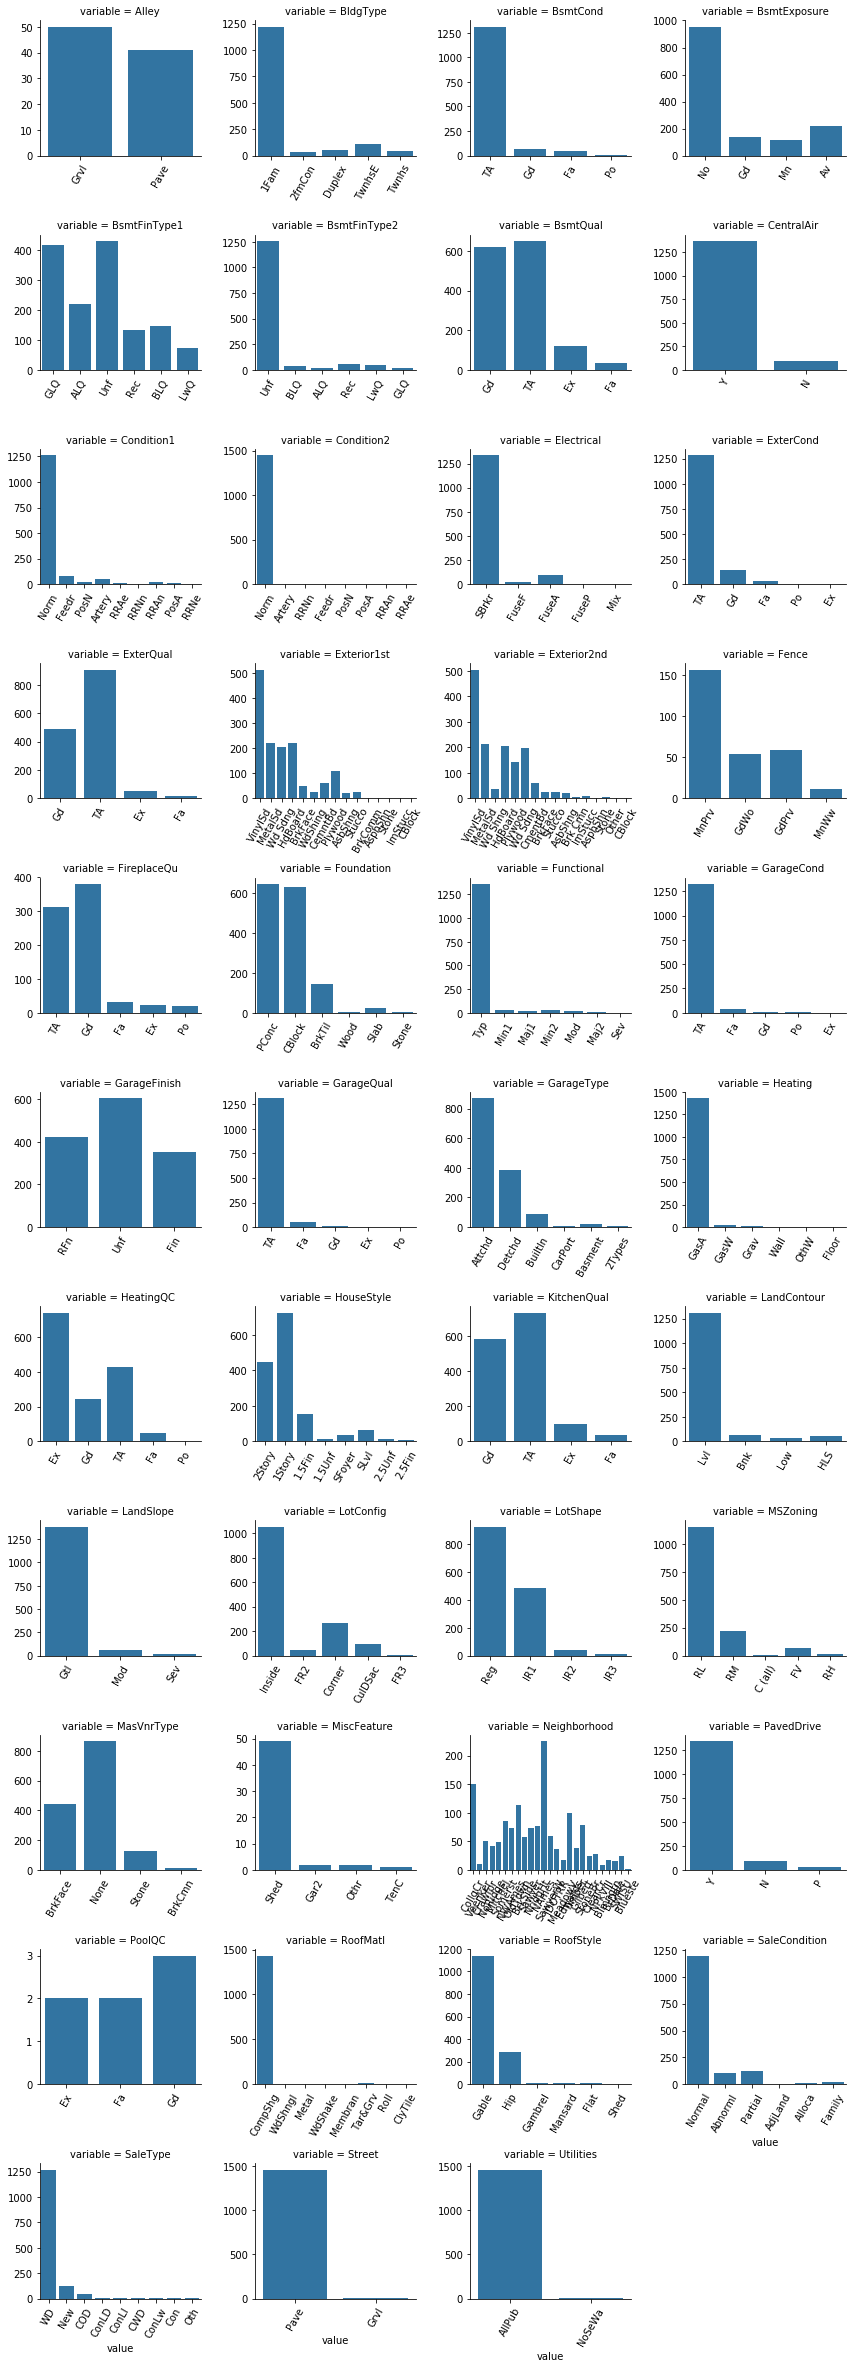

In [7]:
def get_feature_groups():
    # Numerical Features
    num_features = ames_df.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Id','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_features = ames_df.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

# Grid of distribution plots of all numerical features
f = pd.melt(ames_df, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

# Grid of frequency plots of all categoriccal features
f = pd.melt(ames_df, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

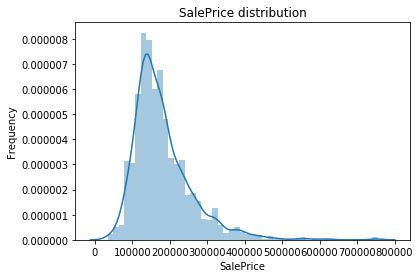

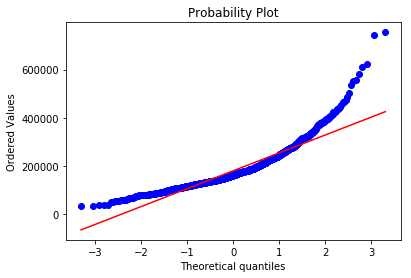

In [8]:
ames_df['SalePrice'].describe()
sns.distplot(ames_df['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# draw the qq plot to check for normality
fig = plt.figure()
res = stats.probplot(ames_df['SalePrice'], plot=plt)
plt.show()

# the qqplot does not show linearity, so we need to transform SalePrice

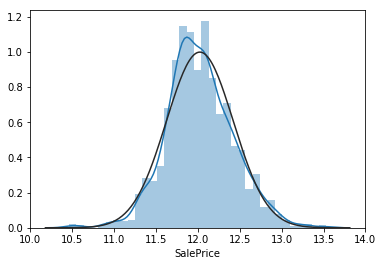

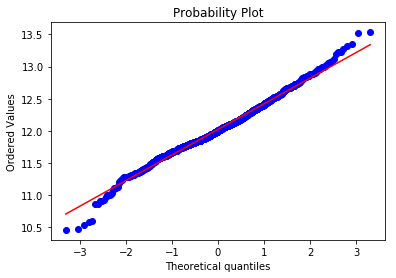

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    

In [9]:
# log transformation
ames_df["SalePrice"] = np.log1p(ames_df["SalePrice"])

#Check the new distribution 
sns.distplot(ames_df['SalePrice'] , fit=norm);

# check the new qq plot
fig = plt.figure()
res = stats.probplot(ames_df['SalePrice'], plot=plt)
plt.show()

# much more linear post-log transformation

print("Find most important features relative to target")
corr = ames_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

In [10]:
# store the logged salesprice
yT = ames_df["SalePrice"]
print(yT[1:5])

1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64


In [11]:
ames_df.shape

(1460, 81)

In [12]:
test_data.shape

(1459, 80)

In [13]:
all_data = ames_df
all_data.head()
all_data.shape

(1460, 81)

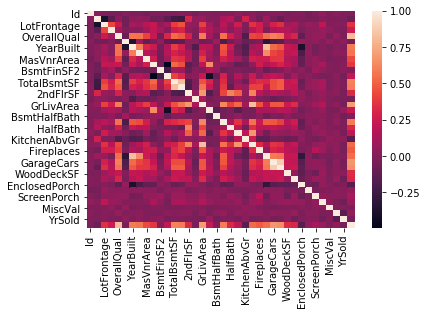

In [14]:
corr = all_data.corr()
sns.heatmap(corr)

In [15]:
alltrain = all_data.drop(['SalePrice'], axis=1)
traintest = alltrain.append(test_data)

# convert using dummies
traintest = pd.get_dummies(traintest)
dataLength = all_data.shape[0]
all_data_num = traintest[0:dataLength]
test_data_num = traintest[dataLength:]

# fill missing values
all_data_num = all_data_num.fillna(method = "bfill")
test_data_num = test_data_num.fillna(method = "bfill")

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(all_data_num)
all_data_num = scaler.transform(all_data_num)

scaler.fit(test_data_num)
test_data_num = scaler.transform(test_data_num)

In [17]:
print(test_data_num.shape, all_data_num.shape)

(1459, 289) (1460, 289)


# Fitting Models 

In [18]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train = all_data_num
X_train.shape

# split the TRAINING DATA further into training and testing
# 80% of the original training remains train, and 20% becomes test
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, yT, test_size = 0.2, random_state = 23)

In [19]:
print("Xtrain : " + str(Xtrain.shape))
print("Xtest : " + str(Xtest.shape))
print("ytrain : " + str(ytrain.shape))
print("ytest : " + str(ytest.shape))

Xtrain : (1168, 289)
Xtest : (292, 289)
ytrain : (1168,)
ytest : (292,)


Model : Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(Xtrain, ytrain)
predictions = linear_regression_model.predict(Xtrain)
mse = mean_squared_error(ytrain, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 1077.419634533403


In [21]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(Xtrain, ytrain)
train_predictions = linear_regression_model.predict(Xtrain)
test_predictions = linear_regression_model.predict(Xtest)

print("Train MSE: {}".format(mean_squared_error(ytrain, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(ytest, test_predictions)))

Train MSE: 91980.47627426978
Test MSE: 35290.20818637361


The train and test MSE for this model are both very high, so this would not be a good model to use. 

Model: Elastic Net

In [22]:
from sklearn.linear_model import ElasticNetCV

# the alphas tell us how much to weight regularization
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
clf.fit(Xtrain, ytrain)
train_predictions = clf.predict(Xtrain)
test_predictions = clf.predict(Xtest)
print("Train MSE: {}".format(mean_squared_error(ytrain, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(ytest, test_predictions)))

Train MSE: 0.013800580123106981
Test MSE: 0.014902018574020189


The train and test MSE are both close, so this indicates that our model is probably a little overfit. Additionally, because they are both low, this indicates that there is likely also some bias. 

Model: Ridge Regression

300.0


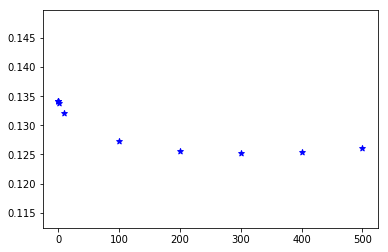

In [23]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

# iterate to find the best value of alpha
listPara=[0.0001, 0.001, 0.01, 1, 10, 100, 200, 300, 400, 500]
# record the error for each parameter chosen
error = []
for i in range(len(listPara)):
    # apply ridge regression
    ridgeReg = Ridge(alpha=listPara[i], copy_X=True, fit_intercept=True)
    ridgeReg.fit(Xtrain, ytrain)
    optPredict = ridgeReg.predict(Xtest)
    # calculate the error
    error.append(np.sqrt(mean_squared_error(optPredict, ytest)))
# plot the error
plt.scatter(x=listPara, y=error, color='b', marker='*')
# calculate the best parameter in list
print(pd.Series(data=error, index=listPara).idxmin())

300


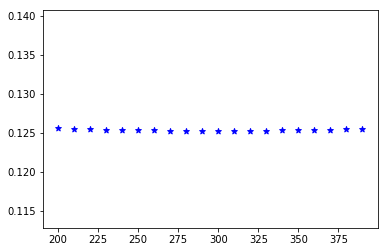

In [24]:
# iterate through the parameter list again
listPara = np.arange(200, 400, 10)

error = []
for i in range(len(listPara)):
    # apply ridge regression
    ridgeReg = Ridge(alpha=listPara[i], copy_X=True, fit_intercept=True)
    ridgeReg.fit(Xtrain, ytrain)
    optPredict = ridgeReg.predict(Xtest)
    # calculate the error
    error.append(np.sqrt(mean_squared_error(optPredict, ytest)))

plt.scatter(x=listPara, y=error, color='b', marker='*')
# calculate the best parameter in list
print(pd.Series(data=error, index=listPara).idxmin())

298.10000000000184


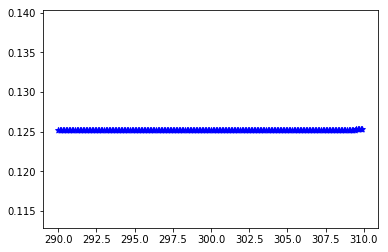

In [25]:
# iterate through the parameter list again
listPara = np.arange(290, 310, .1)
error = []
for i in range(len(listPara)):
    # apply ridge regression
    ridgeReg = Ridge(alpha=listPara[i], copy_X=True, fit_intercept=True)
    ridgeReg.fit(Xtrain, ytrain)
    optPredict = ridgeReg.predict(Xtest)
    # calculate the error
    error.append(np.sqrt(mean_squared_error(optPredict, ytest)))

plt.scatter(x=listPara, y=error, color='b', marker='*')
# calculate the best parameter in list
print(pd.Series(data=error, index=listPara).idxmin())

Our iterations have stopped at alpha = 298.10000000000184, which I am just going to round to alpha = 298. 

In [26]:
# fit the model with the chosen value of alpha = 298
ridge = Ridge(alpha=298)
# use all training data available
ridgeReg.fit(Xtrain, ytrain)
train_predictionsR = ridgeReg.predict(Xtrain)
test_predictionsR = ridgeReg.predict(Xtest)

print("Train MSE: {}".format(mean_squared_error(ytrain, train_predictionsR)))
print("Test MSE: {}".format(mean_squared_error(ytest, test_predictionsR)))

Train MSE: 0.00989001847362108
Test MSE: 0.01569238884098151


The train and test MSE are both close, but not as close as with the elastic net CV model. Again, this indicates that our model is probably a little overfit as well as has some bias. 

Fit the chosen model (elastic net CV)

In [27]:
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
clf.fit(X_train, yT)
test_predictions = clf.predict(test_data_num)
print(test_predictions[1:5])

# back-transform the log-transformation
test_predictions = np.exp(list(test_predictions))-1
print(test_predictions[1:5])

[11.95074169 12.08356115 12.20158297 12.17383793]
[154931.01588009 176938.14680399 199103.07787395 193654.85777792]


Output

In [28]:
my_submission = pd.DataFrame({'Id': test_data.iloc[:, 0], 'SalePrice': test_predictions})
my_submission.to_csv('submission.csv', index = False)

Questions:


Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are their assumptions? And how did you test/account for them? How did you select hyper-parameters?
* I tried linear regression, elastic net CV, and ridge regression. I chose these models because they all deal with numerical data, and I used dummy variables to transform the categorical data into numerical variables. 
* We don't really check the assumptions in machine learning.
* Linear regression: finds the model that minimizes the sum of the residuals (distance between regression line and the observed data points)
* Elastic net CV: combines lasso (adds penalty equivalent to absolute value of the magnitude of coefficients) and ridge regression
* Ridge regression: adds penalty equivalent to square of the magnitude of coefficients
* I checked the quality of each model by looking at the test mean square error and the training mean square error. I split the training data again into test and train data, and I fit a model on "train" and applied it to "test" and then calculated the mean square errors for test and train. 
* To select hyperparameters, I either used the built-in functions in scikit learn or iterated through. 

Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results?
* The model results, from my chosen elastic net CV model, tell me our model is probably a little overfit because the train and test MSE are both close. Additionally, because they are both low, this indicates that there is likely also some bias. 
* To reduce variance, it would be helpful to have more training data, because this helps improve the model. 

Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.
* I think the final model was useful, because we had low MSEs. I would recommend using it by obtaining data from companies about the houses that they are trying to sell and predicting the price at which they could sell, so that the homeowners are not asking for too much when they put the house on the market. 